```python
import os
import wget
import tarfile
from sklearn.datasets import load_files

# 1️⃣ Download the dataset
url = "http://www.cs.cornell.edu/people/pabo/movie-review-data/review_polarity.tar.gz"
filename = wget.download(url)
print(f"Downloaded: {filename}")

# 2️⃣ Extract the .tar.gz file
if filename.endswith("tar.gz"):
    with tarfile.open(filename, "r:gz") as tar:
        tar.extractall()
        print("Extraction completed.")

# After extraction, the dataset will be in a folder named 'txt_sentoken'
# It has two subfolders: 'pos' and 'neg'

# 3️⃣ Load the dataset with sklearn
movies = load_files(container_path="txt_sentoken", encoding="utf-8")
x, y = movies.data, movies.target

print(f"Total samples: {len(x)}")
print(f"Positive/Negative labels: {set(y)}")
```

In [1]:
import pickle

```python
# Save (serialize) the loaded dataset
with open("movies_dataset.pkl", "wb") as f:
    pickle.dump(movies, f)
```

In [2]:
# Later (load it again)
with open("movies_dataset.pkl", "rb") as f:
    movies = pickle.load(f)

x, y = movies.data, movies.target
print(len(x), len(y))

2000 2000


In [3]:
# 'neg' -> 0, 'pos' -> 1
print(movies.target_names)

['neg', 'pos']


In [4]:
# First sample and target
print(f'Sample: {x[0]} \nTarget: {y[0]}')

Sample: arnold schwarzenegger has been an icon for action enthusiasts , since the late 80's , but lately his films have been very sloppy and the one-liners are getting worse . 
it's hard seeing arnold as mr . freeze in batman and robin , especially when he says tons of ice jokes , but hey he got 15 million , what's it matter to him ? 
once again arnold has signed to do another expensive blockbuster , that can't compare with the likes of the terminator series , true lies and even eraser . 
in this so called dark thriller , the devil ( gabriel byrne ) has come upon earth , to impregnate a woman ( robin tunney ) which happens every 1000 years , and basically destroy the world , but apparently god has chosen one man , and that one man is jericho cane ( arnold himself ) . 
with the help of a trusty sidekick ( kevin pollack ) , they will stop at nothing to let the devil take over the world ! 
parts of this are actually so absurd , that they would fit right in with dogma . 
yes , the film is 

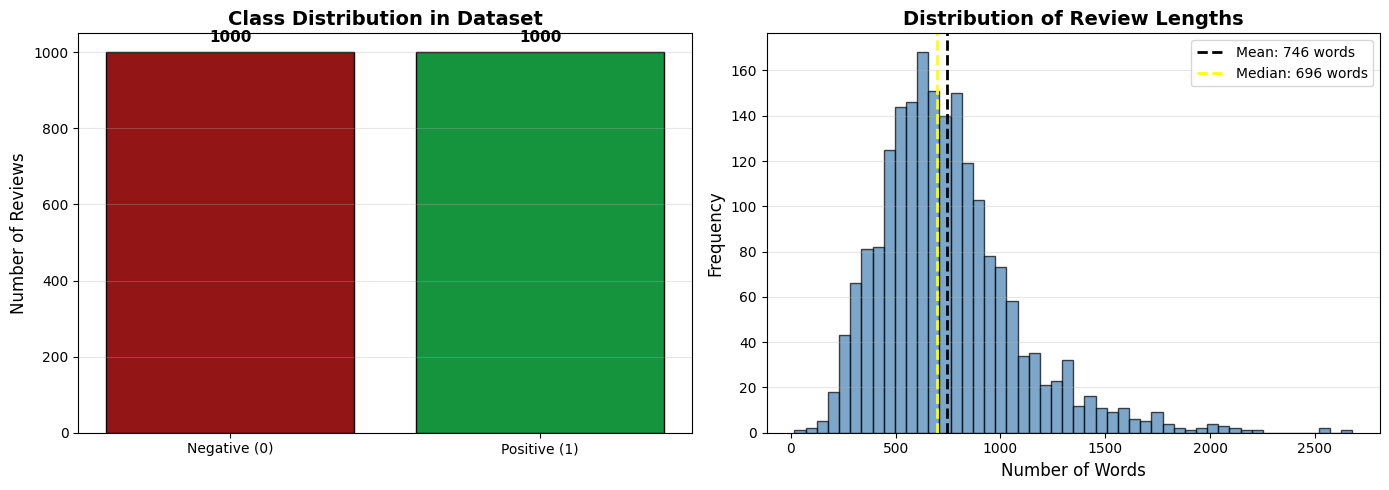

DATASET SUMMARY
Total reviews: 2000
Negative reviews: 1000 (50.0%)
Positive reviews: 1000 (50.0%)

Review Length Statistics:
  Min length: 17 words
  Max length: 2678 words
  Mean length: 746.3 words
  Median length: 696.5 words
  Std deviation: 328.3 words


In [5]:
from matplotlib import pyplot as plt
import numpy as np

# Plot 1: Class Distribution
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Class distribution
class_counts = np.bincount(y)
axes[0].bar(['Negative (0)', 'Positive (1)'], class_counts, color=['#941515', '#15943d'], edgecolor='black')
axes[0].set_ylabel('Number of Reviews', fontsize=12)
axes[0].set_title('Class Distribution in Dataset', fontsize=14, fontweight='bold')
axes[0].grid(axis='y', alpha=0.3)
# Add count labels on bars
for i, count in enumerate(class_counts):
    axes[0].text(i, count + 20, str(count), ha='center', va='bottom', fontsize=11, fontweight='bold')

# Plot 2: Review Length Distribution
review_lengths = [len(str(review).split()) for review in x]
axes[1].hist(review_lengths, bins=50, color='steelblue', edgecolor='black', alpha=0.7)
axes[1].axvline(np.mean(review_lengths), color='black', linestyle='--', linewidth=2, label=f'Mean: {np.mean(review_lengths):.0f} words')
axes[1].axvline(np.median(review_lengths), color='yellow', linestyle='--', linewidth=2, label=f'Median: {np.median(review_lengths):.0f} words')
axes[1].set_xlabel('Number of Words', fontsize=12)
axes[1].set_ylabel('Frequency', fontsize=12)
axes[1].set_title('Distribution of Review Lengths', fontsize=14, fontweight='bold')
axes[1].legend()
axes[1].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

# Print summary statistics
print("="*60)
print("DATASET SUMMARY")
print("="*60)
print(f"Total reviews: {len(x)}")
print(f"Negative reviews: {class_counts[0]} ({class_counts[0]/len(x)*100:.1f}%)")
print(f"Positive reviews: {class_counts[1]} ({class_counts[1]/len(x)*100:.1f}%)")
print(f"\nReview Length Statistics:")
print(f"  Min length: {min(review_lengths)} words")
print(f"  Max length: {max(review_lengths)} words")
print(f"  Mean length: {np.mean(review_lengths):.1f} words")
print(f"  Median length: {np.median(review_lengths):.1f} words")
print(f"  Std deviation: {np.std(review_lengths):.1f} words")
print("="*60)

!python -m spacy download en_core_web_sm

In [6]:
import spacy
import re
from tqdm import tqdm

# Load spaCy model — for English, for Greek you may need something like "el_core_news_sm"
nlp = spacy.load("en_core_web_sm", disable=["ner","parser"])  
# disabling parser and ner may speed up processing since you only need POS + lemma

docs = []
for doc_text in tqdm(x):
    # Remove non-word characters (punctuation etc)
    doc_clean = re.sub(r'\W', ' ', str(doc_text))
    # Remove single characters (optional)
    doc_clean = re.sub(r'\s+[a-zA-Z]\s+', ' ', doc_clean)
    # Collapse multiple spaces
    doc_clean = re.sub(r'\s+', ' ', doc_clean, flags=re.I)
    # Lowercase
    doc_clean = doc_clean.lower().strip()
    
    # Process with spaCy
    doc = nlp(doc_clean)
    tokens = []
    for token in doc:
        # filter: only alphabetic tokens, non-stopwords, maybe length > 1
        if token.is_alpha and not token.is_stop:
            tokens.append(token.lemma_)
    # Reconstruct document string
    docs.append(" ".join(tokens))

print("\nOriginal review text:\n{}".format(x[0]))
print("\nFiltered review text:\n{}".format(docs[0]))
print("\nLabel:\n", y[0])

100%|██████████████████████████████████████████████████████████████████████████████| 2000/2000 [02:36<00:00, 12.78it/s]


Original review text:
arnold schwarzenegger has been an icon for action enthusiasts , since the late 80's , but lately his films have been very sloppy and the one-liners are getting worse . 
it's hard seeing arnold as mr . freeze in batman and robin , especially when he says tons of ice jokes , but hey he got 15 million , what's it matter to him ? 
once again arnold has signed to do another expensive blockbuster , that can't compare with the likes of the terminator series , true lies and even eraser . 
in this so called dark thriller , the devil ( gabriel byrne ) has come upon earth , to impregnate a woman ( robin tunney ) which happens every 1000 years , and basically destroy the world , but apparently god has chosen one man , and that one man is jericho cane ( arnold himself ) . 
with the help of a trusty sidekick ( kevin pollack ) , they will stop at nothing to let the devil take over the world ! 
parts of this are actually so absurd , that they would fit right in with dogma . 
yes

```python
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(docs, y, test_size=0.3, random_state=2025) # shuffle=True by default
# x_train, x_test, y_train, y_test = train_test_split(docs, y, test_size=0.3, random_state=2025, stratify=y) # stratify preserves class distribution across splits (recommended for imbalanced classes)
```

In [7]:
from sklearn.model_selection import train_test_split

# 1️⃣ Split into train (70%) and temp (30%)
x_train, x_temp, y_train, y_temp = train_test_split(
    docs, y, test_size=0.3, random_state=2025)

# 2️⃣ Split temp into validation (10%) and test (20%)
# 10% of total = 10/30 = 1/3 of temp
x_val, x_test, y_val, y_test = train_test_split(
    x_temp, y_temp, test_size=(2/3), random_state=2025)

print(len(x_train), len(x_val), len(x_test))

1400 200 400


```python
from sklearn.feature_extraction.text import TfidfVectorizer

# Exclude stopwords

# --- NLTK ---
# nltk.download('stopwords')
# from nltk.corpus import stopwords
# # Get NLTK’s English stop-words
# stopwords = stopwords.words('english')

# --- spacy ---
import spacy
# Load spaCy model (for English texts)
nlp = spacy.load("en_core_web_sm")
# Get spaCy’s default stop-words
stopwords = list(nlp.Defaults.stop_words)

# Use unigram & bi-gram tf*idf features
vectorizer = TfidfVectorizer(
    ngram_range = (1, 2), # Unigrams and Bigrams → captures single words and frequent two-word phrases.
    max_features = 5000,  # Max 5,000 features → keeps the top features by importance.
    #Apply sublinear tf scaling, i.e. replace tf with 1 + log(tf) → dampens the effect of very frequent terms.
    sublinear_tf = True)
    # max_df = 0.x,          # Ignore terms that appear in more than x% of the documents (ignore too common tokens)
    # min_df = y,            # Ignore terms that appear in fewer than y documents (ignore too rare tokens)
    # stop_words and lowercase were already applied during preprocessing, but are supported by the vectorizer as well
    
# Fit Vectorizer on train data
# Transform on all data (train - test)
x_train_tfidf = vectorizer.fit_transform(x_train)
x_test_tfidf = vectorizer.transform(x_test)

print([vectorizer.get_feature_names_out()[i] for i in range(1, 50, 5)]) # Shows the learned vocabulary
print(len(vectorizer.get_feature_names_out())) # Number of features == 5000
```

In [8]:
from sklearn.feature_extraction.text import TfidfVectorizer
import spacy

# Load spaCy model (for English texts)
nlp = spacy.load("en_core_web_sm")
# Get spaCy’s default stop-words
stopwords = list(nlp.Defaults.stop_words)

# Use unigram & bi-gram tf*idf features
vectorizer = TfidfVectorizer(
    ngram_range=(1, 2),
    max_features=5000,
    sublinear_tf=True
)

# Fit Vectorizer on train data
x_train_tfidf = vectorizer.fit_transform(x_train)
x_val_tfidf = vectorizer.transform(x_val)
x_test_tfidf = vectorizer.transform(x_test)

print([vectorizer.get_feature_names_out()[i] for i in range(1, 50, 5)]) 
print(len(vectorizer.get_feature_names_out()))

['ability', 'absolute', 'abyss', 'acceptable', 'accomplish', 'accuse', 'acid', 'action film', 'action sequence', 'actor play']
5000


In [9]:
print(f'Shape of train data: {x_train_tfidf.shape}')
print(f'Shape of val data: {x_val_tfidf.shape}')
print(f'Shape of test data: {x_test_tfidf.shape}')

# TFIDF Vectorizer returns Sparse matrix structures --> Saves only the cells which are not zero (be memory efficient), so it can not be printed directly
print(x_test_tfidf.todense()[0, :40])

Shape of train data: (1400, 5000)
Shape of val data: (200, 5000)
Shape of test data: (400, 5000)
[[0.         0.         0.05449696 0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.05867306 0.06853785
  0.         0.         0.         0.        ]]


In [10]:
import seaborn as sns
import matplotlib.pyplot as plt
# Set the theme for seaborn plots
sns.set_theme(rc={'figure.figsize':(8,6)})

Training took: 0.0016 seconds 

Train accuracy: 50.64%
Test accuracy: 50.50% 

#Class 0 in Train dataset: (691,)
#Class 1 in Train dataset: (709,)

Confusion Matrix for test data:


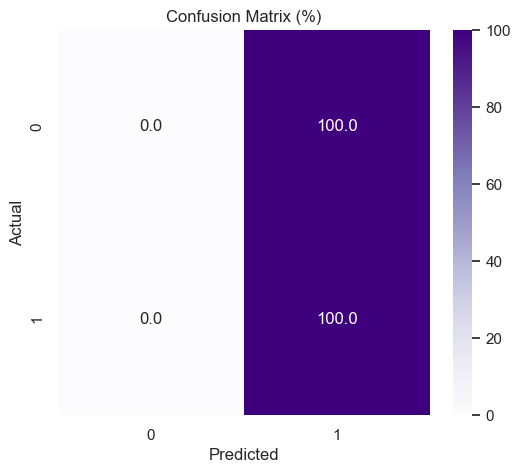

In [11]:
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import time

# Train baseline model
baseline = DummyClassifier(strategy='most_frequent')
start_time = time.time()
baseline.fit(x_train_tfidf, y_train)
print(f"Training took: {time.time() - start_time:.4f} seconds \n")

# Evaluate
predictions = baseline.predict(x_train_tfidf)
score = accuracy_score(y_train, predictions)
print(f"Train accuracy: {score*100:.2f}%")

predictions_test = baseline.predict(x_test_tfidf)
score = accuracy_score(y_test, predictions_test)
print(f"Test accuracy: {score*100:.2f}% \n")

print('#Class 0 in Train dataset:', np.where(y_train == 0)[0].shape)
print('#Class 1 in Train dataset:', np.where(y_train == 1)[0].shape)

print("\nConfusion Matrix for test data:")

# Compute confusion matrix
cm = confusion_matrix(y_test, predictions_test)

# Compute percentages
cm_percent = cm / cm.sum(axis=1, keepdims=True) * 100

# Plot with percentages
plt.figure(figsize=(6,5))
sns.heatmap(cm_percent, annot=True, fmt='.1f', cmap='Purples', cbar=True)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (%)')
plt.show()


logistic regression

```python
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import time

# Train
clf_lr = LogisticRegression(solver="lbfgs", penalty="l2", C=1.0, random_state=2025)

start_time = time.time()
clf_lr.fit(x_train_tfidf, y_train)
print(f"Training took: {time.time() - start_time:.4f} seconds \n")

# Evaluate
predictions = clf_lr.predict(x_train_tfidf)
score = f1_score(y_train, predictions)
print(f"Train f1-score: {score*100:.2f}%")

predictions_test = clf_lr.predict(x_test_tfidf)
score = f1_score(y_test, predictions_test)
print(f"Test f1-score: {score*100:.2f}% \n")

print("\nConfusion Matrix for test data:")

# Compute confusion matrix
cm = confusion_matrix(y_test, predictions_test)

# Convert to percentages row-wise
cm_percent = cm / cm.sum(axis=1, keepdims=True) * 100

# Plot with Seaborn
plt.figure(figsize=(6,5))
sns.heatmap(cm_percent, annot=True, fmt='.1f', cmap='Purples', cbar=True)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (%)')
plt.show()
```

C=0.01 | Training took: 0.0090 seconds
Train f1: 70.20% | Val f1: 63.31%

C=0.1 | Training took: 0.0163 seconds
Train f1: 91.73% | Val f1: 82.80%

C=1.0 | Training took: 0.0231 seconds
Train f1: 96.69% | Val f1: 83.62%

C=10.0 | Training took: 0.0181 seconds
Train f1: 100.00% | Val f1: 84.39%

C=100.0 | Training took: 0.0236 seconds
Train f1: 100.00% | Val f1: 82.76%

Best C: 10.0 with validation f1-score: 84.39%

Test f1-score: 87.90%

Confusion Matrix for test data:


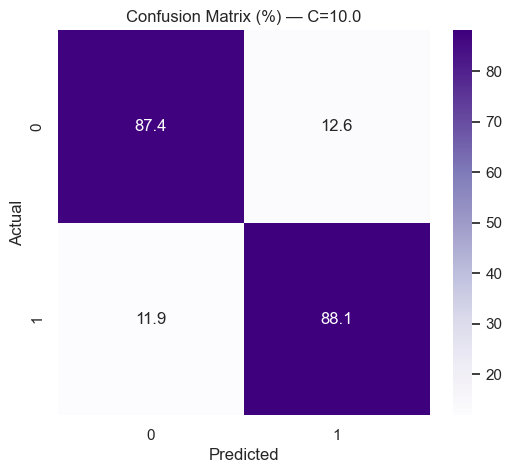

In [12]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import time

# Explore different C values
C_values = [0.01, 0.1, 1.0, 10.0, 100.0]

best_val_score = 0
best_C = None

for C in C_values:
    clf_lr = LogisticRegression(solver="lbfgs", penalty="l2", C=C, random_state=2025)
    
    start_time = time.time()
    clf_lr.fit(x_train_tfidf, y_train)
    print(f"C={C} | Training took: {time.time() - start_time:.4f} seconds")
    
    # Evaluate on train
    train_pred = clf_lr.predict(x_train_tfidf)
    train_f1 = f1_score(y_train, train_pred)
    
    # Evaluate on validation
    val_pred = clf_lr.predict(x_val_tfidf)
    val_f1 = f1_score(y_val, val_pred)
    
    print(f"Train f1: {train_f1*100:.2f}% | Val f1: {val_f1*100:.2f}%\n")
    
    # Track best model
    if val_f1 > best_val_score:
        best_val_score = val_f1
        best_C = C
        best_model = clf_lr
        best_test_pred = best_model.predict(x_test_tfidf)

print(f"Best C: {best_C} with validation f1-score: {best_val_score*100:.2f}%")

# Evaluate best model on test set
test_pred = best_model.predict(x_test_tfidf)
test_f1 = f1_score(y_test, test_pred)
print(f"\nTest f1-score: {test_f1*100:.2f}%")

print("\nConfusion Matrix for test data:")

# Compute confusion matrix
cm = confusion_matrix(y_test, test_pred)

# Convert to percentages row-wise
cm_percent = cm / cm.sum(axis=1, keepdims=True) * 100

# Plot with Seaborn
plt.figure(figsize=(6,5))
sns.heatmap(cm_percent, annot=True, fmt='.1f', cmap='Purples', cbar=True)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title(f'Confusion Matrix (%) — C={best_C}')
plt.show()

In [13]:
from sklearn.metrics import classification_report

results = classification_report(best_test_pred, y_test, digits=2)
print(results)

              precision    recall  f1-score   support

           0       0.87      0.88      0.88       197
           1       0.88      0.88      0.88       203

    accuracy                           0.88       400
   macro avg       0.88      0.88      0.88       400
weighted avg       0.88      0.88      0.88       400



knn

Training took: 0.002986907958984375 seconds 

Train f1-score: 82.83%
Test f1-score: 72.94% 


Confusion Matrix for test data:


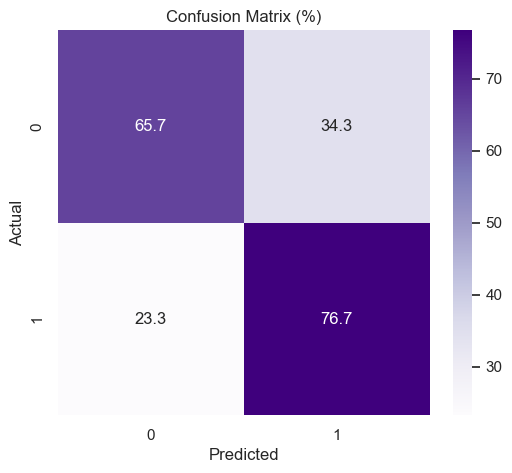

In [14]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score

# Train
clf_knn = KNeighborsClassifier(n_neighbors=5)
start_time = time.time()
clf_knn.fit(x_train_tfidf, y_train)
print(f"Training took: {time.time() - start_time} seconds \n")

# Evaluate
predictions = clf_knn.predict(x_train_tfidf)
score = f1_score(y_train,predictions)
print(f"Train f1-score: {score*100:.2f}%")

predictions_test = clf_knn.predict(x_test_tfidf)
score = f1_score(y_test, predictions_test)
print(f"Test f1-score: {score*100:.2f}% \n")

print("\nConfusion Matrix for test data:")

# Compute confusion matrix
cm = confusion_matrix(y_test, predictions_test)

# Convert to percentages row-wise
cm_percent = cm / cm.sum(axis=1, keepdims=True) * 100

# Plot with Seaborn
plt.figure(figsize=(6,5))
sns.heatmap(cm_percent, annot=True, fmt='.1f', cmap='Purples', cbar=True)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (%)')
plt.show()

learning curves

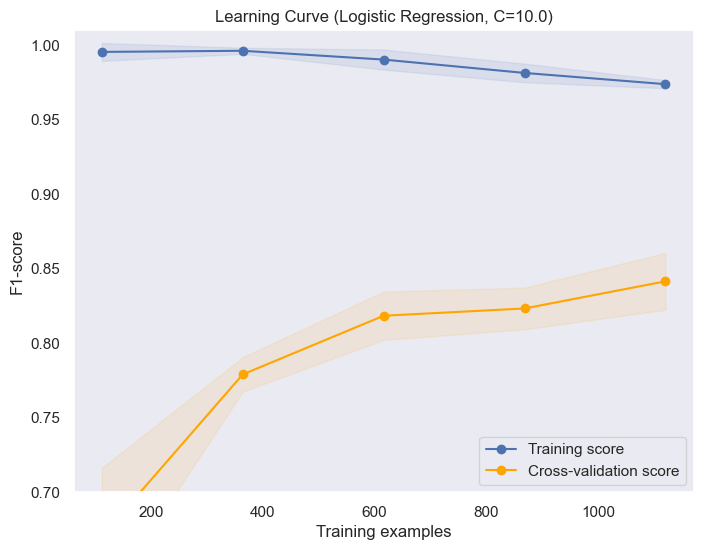

In [15]:
# Learning curves with cross-validation
from sklearn.model_selection import learning_curve, ShuffleSplit

def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):

    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("F1-score")

    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, scoring='f1', train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()
    
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                    train_scores_mean + train_scores_std, alpha=0.1, color="b")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                    test_scores_mean + test_scores_std, alpha=0.1, color="orange")
    
    plt.plot(train_sizes, train_scores_mean, 'o-', color="b", label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="orange", label="Cross-validation score")

    plt.legend(loc="lower right")
    return plt


# ---- MAIN ----
x, y = x_train_tfidf, y_train

title = f"Learning Curve (Logistic Regression, C={best_C})"
cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
estimator = LogisticRegression(solver="lbfgs", penalty="l2", C=1, random_state=2025)

_=plot_learning_curve(estimator, title, x, y, ylim=(0.7, 1.01), cv=cv, n_jobs=-1)
plt.show()
